## Problem Statement

`A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. `


`In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.`


`They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:`

`Which variables are significant in predicting the demand for shared bikes.`
`How well those variables describe the bike demands`
`Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.` 



**Business Goals**

`You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. `

## 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Math Libraries
import numpy as np 
import pandas as pd
from math import sqrt

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Machine Learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#SKLearn Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## 2. Reading and Understanding Data

**2.1 Importing Data**

In [6]:
bike = pd.read_csv('day.csv')

**2.2 Inspecting Data**

In [7]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike.shape

(730, 16)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike.size

11680

In [13]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [14]:
bike.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [15]:
bike.ndim

2

In [16]:
bike.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

**Insights:**
- `The data has 730 rows and 16 columns.`
- `Except one column which is object(data type), all other columns are float and integer type.`
- `There are some fields that are categorical in nature but are in integer/float type. `
    - `Example: season, mnth, weathersit etc.`
 
 - `We will be analysing it to decide whether to convert them to categorical or keep them as integer.`

**2.3 Data Quality Check**

In [17]:
# Check for missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- `No missing values present in the data.`

**2.4 Check for duplicates**

In [18]:
bike_dup = bike
#Checking the duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset = None, inplace = True)
bike_dup.shape

(730, 16)

- `The shape after running the drop command is same as the original DataFrame. Hence we can conclude that there are no duplicates present in the data.`

**Removing Redundant Columns**

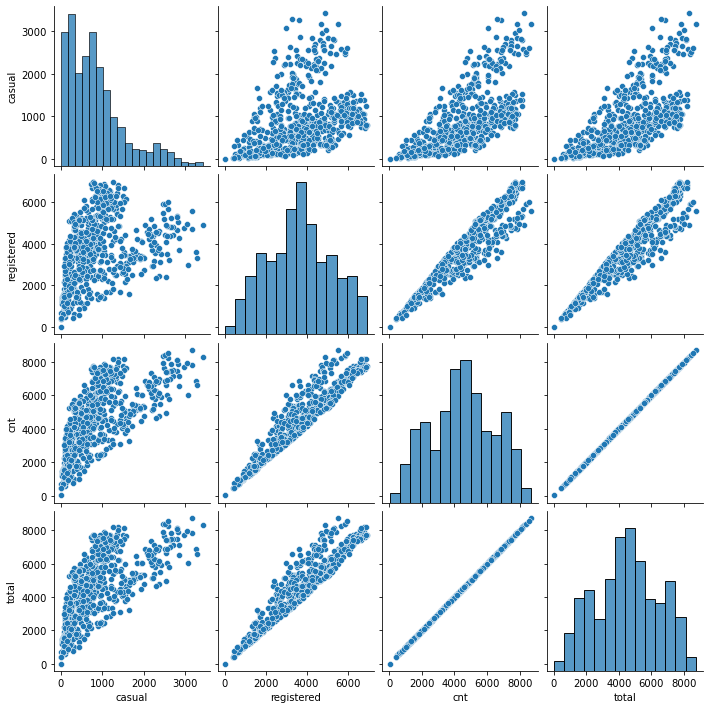

In [19]:
#Checking relationship between casual, registered and cnt column.
bike_cnt = bike[['casual', 'registered', 'cnt']]
#Creating a column which will show the value casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']
sns.pairplot(bike_cnt)
plt.show()

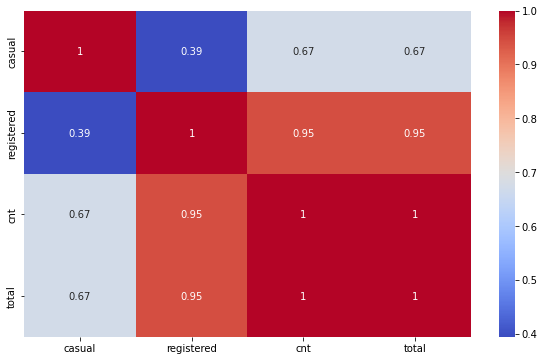

In [20]:
#Checking correlation of the variables
plt.figure(figsize = [10,6])
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap = 'coolwarm')
plt.show()

**Based on the high level analysis of the data and the data dictionary the following variables can be removed from further analysis:**
- `instant:` `It is only an index value.`
- `dteday:` `This has the date. Since we already have a separate column for 'year' & 'month' we would be fine without this column.`
- `casual & registered:` `Both these columns conatin the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can conclude thattotal bike rental value 'cnt' = 'casual' + 'registered'. Since we need to find total count of bikes and not by specific category, we will ignore these 2 columns.`

In [21]:
#dropping the unwanted columns
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

## 3. Encoding and Visualizing the Data

**3.1 Encoding Categorical Columns**

`Converting season, mnth, weathersit and weekday to categorical columns`
- `season:` `Converting season values as per the criteria - 1. Spring, 2. Summer, 3. Fall, 4. Winter`
- `mnth:` `Converting mnth values as - 1. Jan, 2. Feb, 3. Mar, 4. Apr, 5. May, 6. Jun, 7. Jul, 8. Aug, 9. Sep, 10. Oct, 11. Nov, 12. Dec`
- `weathersit:` `Converting weathersit values as - 1. Clear, 2. Misty, 3. Light_RainSnow, 4. Heavy_RainSnow`
- `weekday:` `Converting weekday values as - 0. Sun, 1. Mon, 2. Tue, 3. Wed, 4. Thu, 5. Fri, 6. Sat`

In [22]:
#Converting season
bike.season.replace((1, 2, 3, 4), ('W1_Spring', 'W2_Summer', 'W3_Fall', 'W4_Winter'), inplace = True)
bike.season.value_counts(normalize = True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [23]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace = True)
bike.mnth.value_counts(normalize = True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [131]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4),('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace = True)
bike.weathersit.value_counts(normalize = True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [24]:
#Converting weekday
bike['weekday'] = bike.weekday.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bike.weekday.value_counts(normalize = True)

Monday       0.143836
Tuesday      0.143836
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: weekday, dtype: float64

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,W1_Spring,0,Jan,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,W1_Spring,0,Jan,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,W1_Spring,0,Jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,W1_Spring,0,Jan,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,W1_Spring,0,Jan,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


**3.2 Categorical Variables Analysis**

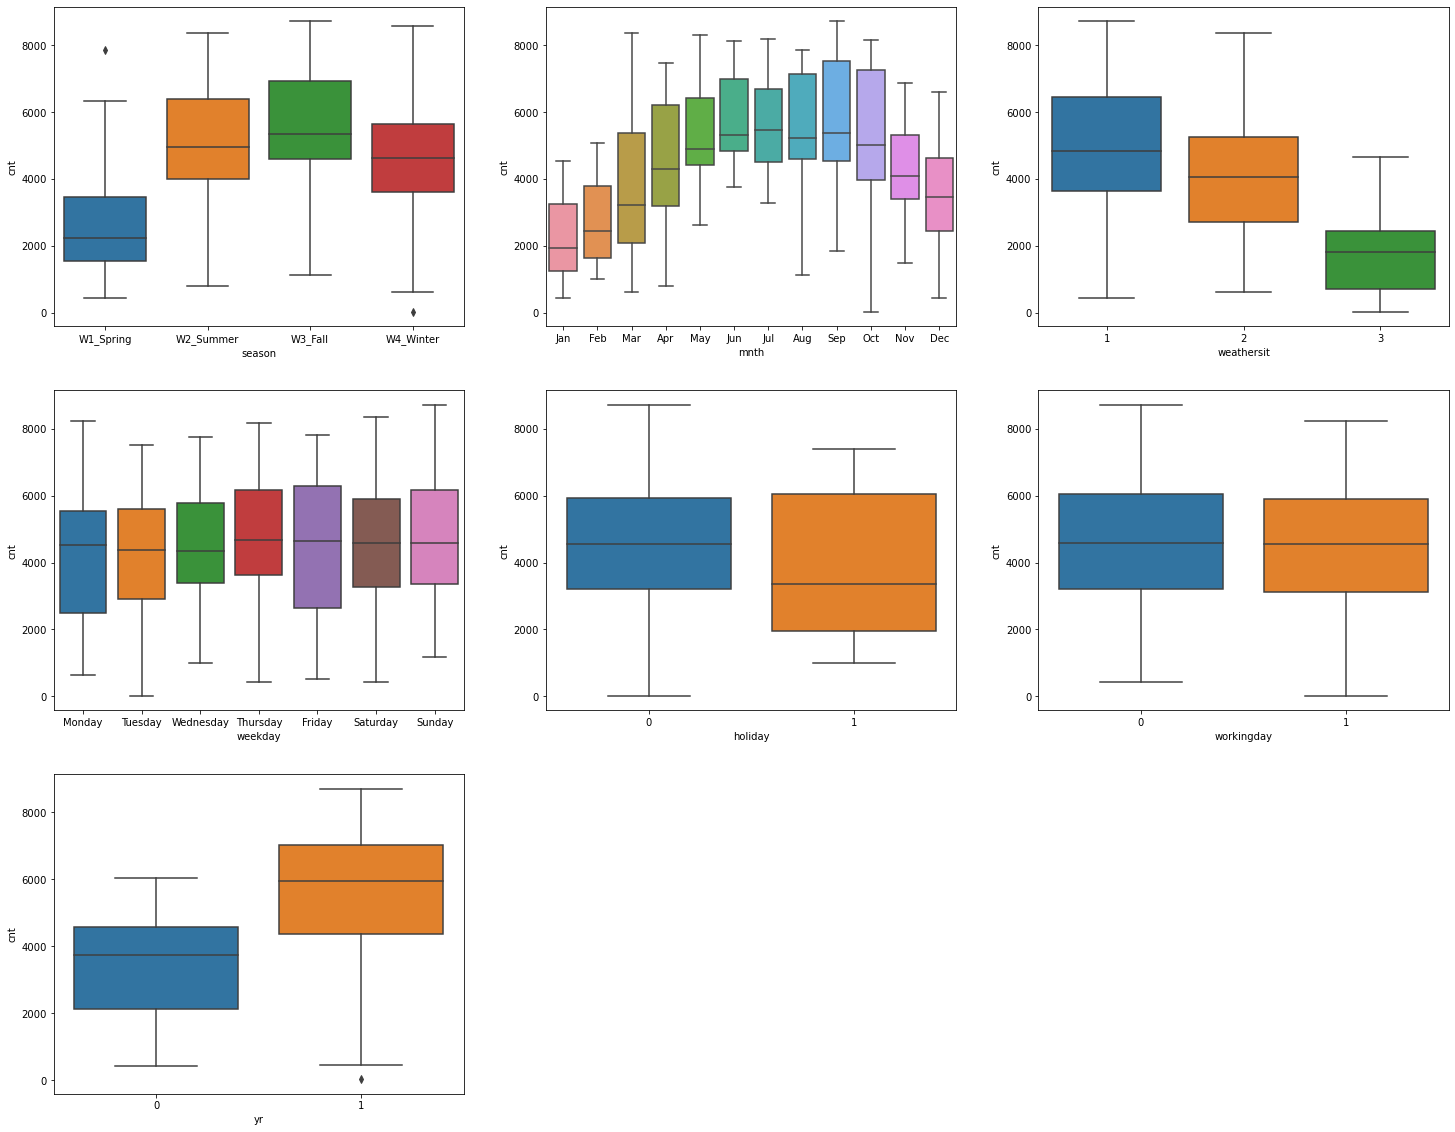

In [26]:
#Building boxplot for all categorical variables(before creating dummies) against target variable 'cnt'
#To see how each of the predictor variable stackup against the target variable.
plt.figure(figsize = [25,20])
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

In [27]:
#Function to generate statistics related to categorical variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum','mean','count']).sort_values('sum', ascending = False)
    cat_df['sum_perc'] = cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc'] = cat_df['count']/bike.cnt.count()*100
    return round(cat_df, 2)

In [28]:
#Function to generate plots related to categorical variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt', data = bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt', data = bike, hue = 'yr', palette = 'Paired')
    plt.legend(labels = ['2018', '2019'])
    return

**3.2.1 Season**

In [29]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


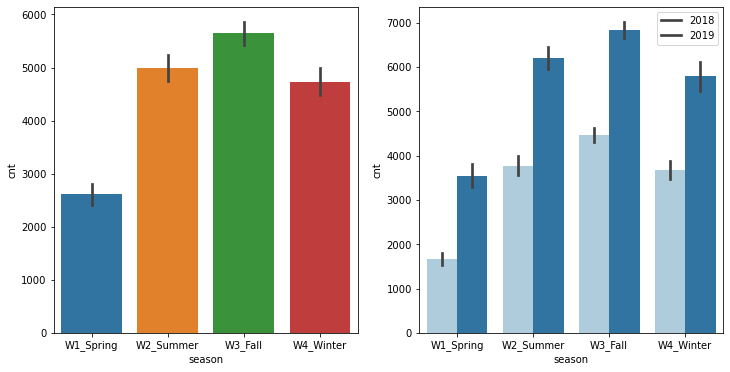

In [30]:
categorical_plot('season',12,6)

- `Almost 32% of the bike bookings were happening in the Fall with a median of over 5000 bookings(for 2 years). It is followed by Summer & Winter with 27% and 25% of total booking. It indicates that the season can be a good predictor of the  dependent variable.`

**3.2.2 Month**

In [31]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


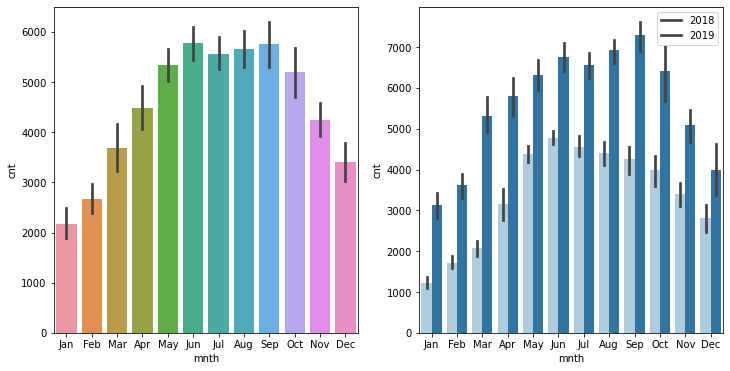

In [140]:
categorical_plot('mnth',12,6)

- `We can observe that almost 10% of the booking was happening in the months of May to Sep with a median of over 4000 bookings per month. It indicates that the month has some trend for bookings and can be a good predictor for the dependent variable.`

**3.2.3 Weather**

In [32]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
1,2257952,4876.79,463,68.61,63.42
2,995024,4044.81,246,30.24,33.70
3,37869,1803.29,21,1.15,2.88


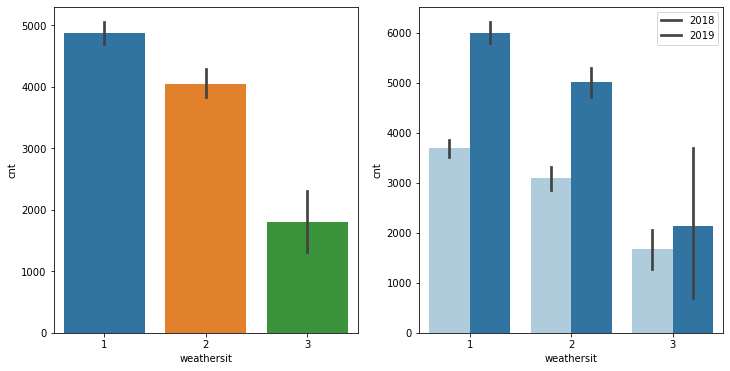

In [33]:
categorical_plot('weathersit',12,6)

- `We can observe that almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings(for 2 years). This was followed by Misty weather with 30% of the total bookings. It indicates that the weathersit does some trend towards the bike bookings and it can be a good predictor for the dependent variable. The current DataFrame doesn't have any data where the weather is Heavy_RainSnow.`

**3.2.4 Weekday**

In [34]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


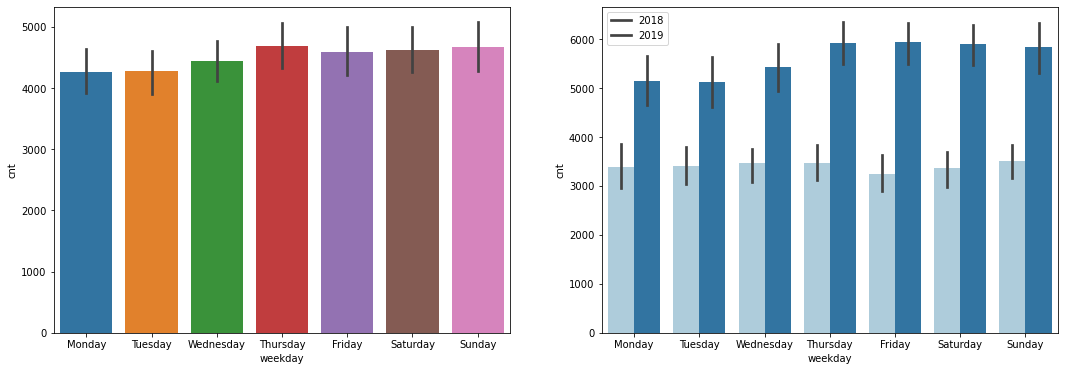

In [35]:
categorical_plot('weekday', 18, 6)

- `We can observe that weekday variable shows the very close trend(between 13.5% to 14.8% of total booking on all days of the week) having their indipendent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection.`

**3.2.5 Holiday**

In [36]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


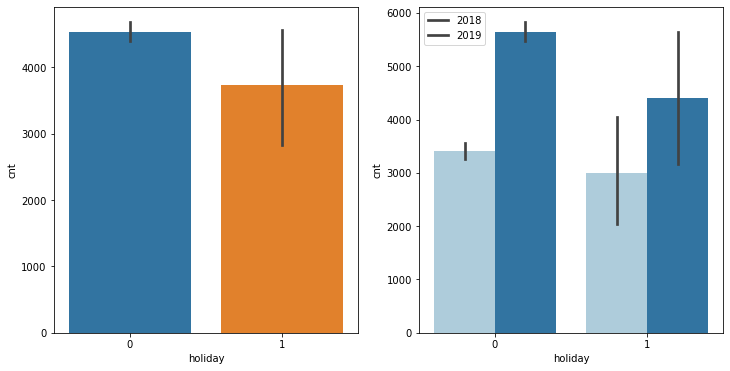

In [37]:
categorical_plot('holiday', 12, 6)

- `We can observe that almost 97% of bike rentals are happening during non-holiday time.`

**3.2.6 Working Day**

In [38]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


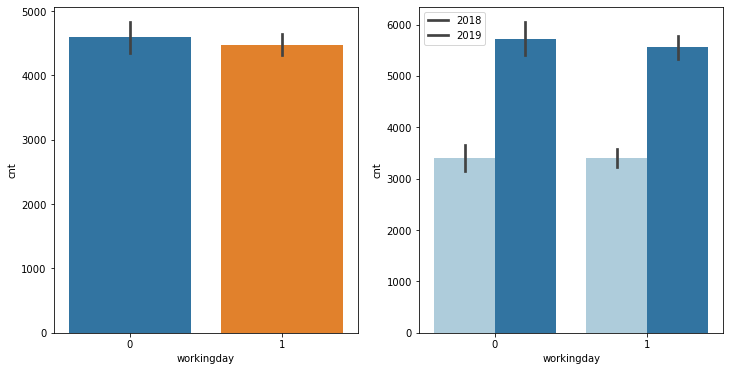

In [39]:
categorical_plot('workingday', 12, 6)

- `We can observe that almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings(for 2 years). It indicates that the workingday can be a good predictor of the dependent variable.`

**3.2.7 Year**

In [40]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


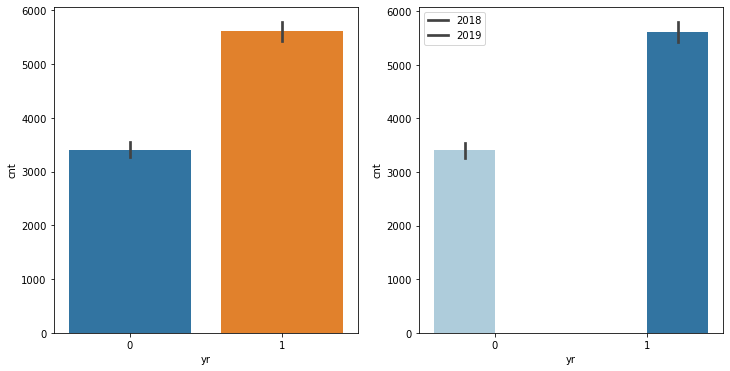

In [41]:
categorical_plot('yr', 12, 6)

**3.3 Numerical Variable Analysis**

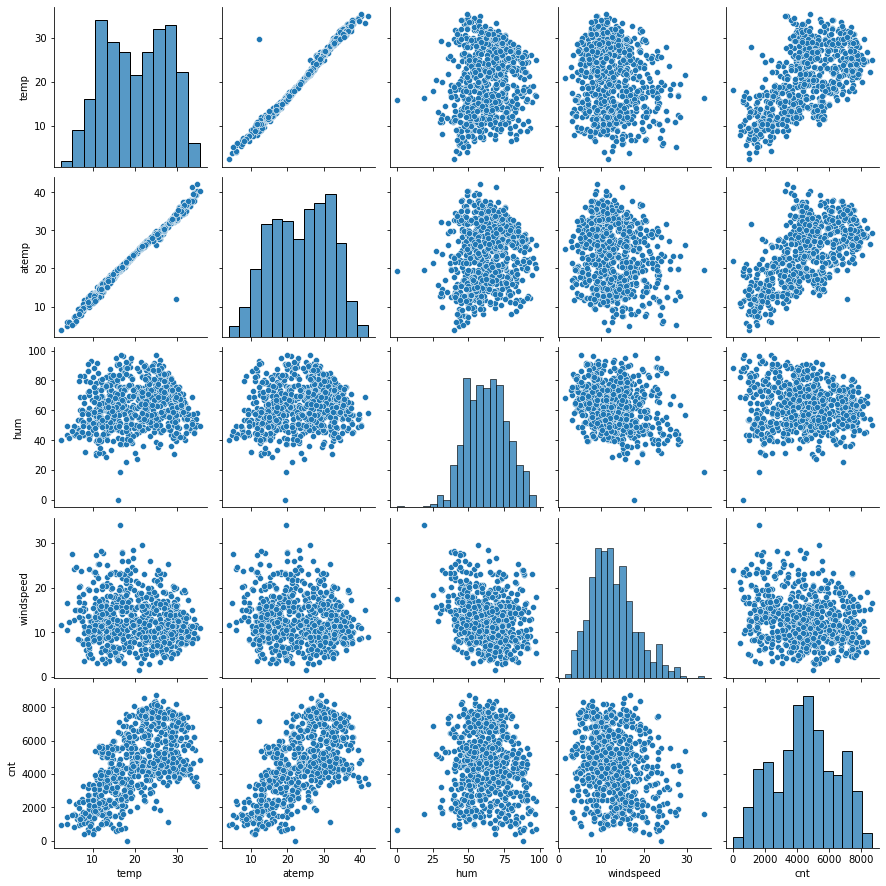

In [42]:
#Generating pairplot to check the relationships between numeric variables
bike_num = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(bike_num)
plt.show()

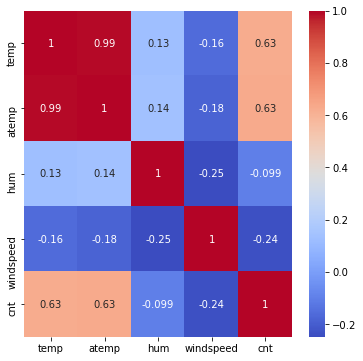

In [152]:
#Checking correlation of the parameters by mapping a correlation heatmap
plt.figure(figsize = [6,6])
ax = sns.heatmap(bike_num.corr(), annot = True, cmap = 'coolwarm')

- `We can observe that there is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.`

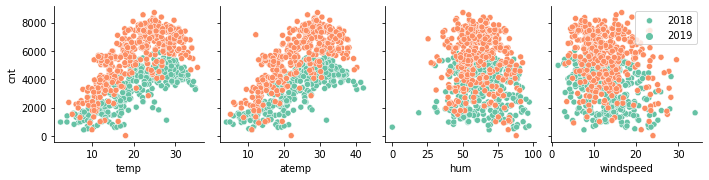

In [43]:
#Checking the impact of year against the numerical variable
ax = sns.pairplot(x_vars = ['temp', 'atemp', 'hum', 'windspeed'], y_vars = ['cnt'], data = bike, hue = 'yr', palette = 'Set2')
ax._legend.remove()
plt.legend(labels = ['2018', '2019'])
plt.show()

- `We can observe that all the parameters have increased values in 2019 as compared to values in 2018. Thus, year may become a key parameter in the model.`

## 4. Data Preparation

**4.1 Dummy Variable Creation**

**`Season:`**

In [44]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head()

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


**`Weather:`**

In [45]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


**`Month:`**

In [46]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


**`Weekday:`**

In [47]:
weekdays = pd.get_dummies(bike['weekday'], drop_first = True)
weekdays.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


**4.2 Merging the Dataset**

In [48]:
#Creating new dataset called bike_new where season, month, weather & weekday dataframe is being added
bike_new = pd.concat([bike, season, month, weather, weekdays], axis = 1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Monday,1,2,14.110847,18.18125,80.5833,...,0,0,1,0,1,0,0,0,0,0
1,W1_Spring,0,Jan,0,Tuesday,1,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,W1_Spring,0,Jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,W1_Spring,0,Jan,0,Thursday,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,W1_Spring,0,Jan,0,Friday,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [49]:
bike_new.shape

(730, 34)

In [50]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  W2_Summer   730 non-null    uint8  
 13  W3_Fall     730 non-null    uint8  
 14  W4_Winter   730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [161]:
bike_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.084932,0.082192,0.028767,0.336986,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.278971,0.274845,0.167266,0.473004,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**4.3 Removing Unnecessary Columns**

In [51]:
#Deleting unnecessary columns season, mnth, weathersit and weekday 
#as the respective values are already populated as binary columns data
bike_new.drop(['season', 'mnth', 'weathersit', 'weekday'], axis = 1, inplace = True)
bike_new.shape

(730, 30)

In [52]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   W2_Summer   730 non-null    uint8  
 9   W3_Fall     730 non-null    uint8  
 10  W4_Winter   730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

- We can observe that all the 30 columns are now as numeric values. Hence, our data is now ready for splitting into Train & Test DataFrame.

## 5. Splitting the data into Train & Test Dataset

**5.1 Train & Test Split**

In [54]:
#We specify this so that train & test dataset, always have same number of rows respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 50)

**`Veryfying train - test split & new dataframe details`**

In [55]:
bike_train.shape

(510, 30)

In [56]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,20.080190,23.46565,62.533910,12.883105,4459.162745,0.254902,0.24902,...,0.086275,0.064706,0.341176,0.031373,0.135294,0.149020,0.133333,0.145098,0.149020,0.150980
std,0.500179,0.151726,0.459559,7.367549,7.99272,14.470666,5.181870,1941.795382,0.436234,0.43287,...,0.281045,0.246248,0.474570,0.174494,0.342373,0.356457,0.340268,0.352545,0.356457,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.95348,0.000000,3.042081,22.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.393347,16.31900,50.906250,9.166940,3068.750000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.107097,23.87875,62.916650,12.187735,4516.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.15990,72.989575,15.625589,5864.250000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.371653,39.74145,97.041700,34.000021,8714.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
bike_test.shape

(220, 30)

In [59]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.540909,0.040909,0.672727,20.873465,24.330605,63.301289,12.486630,4621.236364,0.245455,0.277273,...,0.081818,0.122727,0.327273,0.022727,0.163636,0.127273,0.163636,0.136364,0.131818,0.122727
std,0.499460,0.198531,0.470288,7.808855,8.492257,13.699251,5.229405,1922.158402,0.431338,0.448673,...,0.274713,0.328872,0.470288,0.149373,0.370789,0.334038,0.370789,0.343957,0.339064,0.328872
min,0.000000,0.000000,0.000000,3.993043,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.278711,17.750175,53.552050,8.771138,3334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.234597,25.409675,62.275350,11.833171,4588.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.358972,31.219212,73.031225,15.611168,6154.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- `We can observe that based on the 70% - 30% split between train & test dataset we have 510 rows in train dataset and 220 rows in test dataset.`

**5.2 Rescalling bike_train DataFrame**

In [60]:
#Rescalling using MinMaxScaler
scaler = MinMaxScaler()

In [61]:
#DataFrame before scaling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
172,0,0,1,30.066653,34.69145,70.7500,11.541554,4507,0,1,...,0,0,0,0,0,0,0,0,0,0
14,0,0,1,9.566653,12.40560,49.8750,10.583521,1248,0,0,...,0,0,1,0,1,0,0,0,0,0
204,0,0,1,34.030000,39.74145,55.0833,11.334457,3606,0,1,...,0,0,0,0,0,0,0,0,1,0


In [62]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [63]:
#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0.515992,0,1,...,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0.223565,0.236172,0.513954,0.243603,0.141049,0,0,...,0,0,1,0,1,0,0,0,0,0
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0.412333,0,1,...,0,0,0,0,0,0,0,0,1,0


**5.3 Checking Correlation Coefficient**

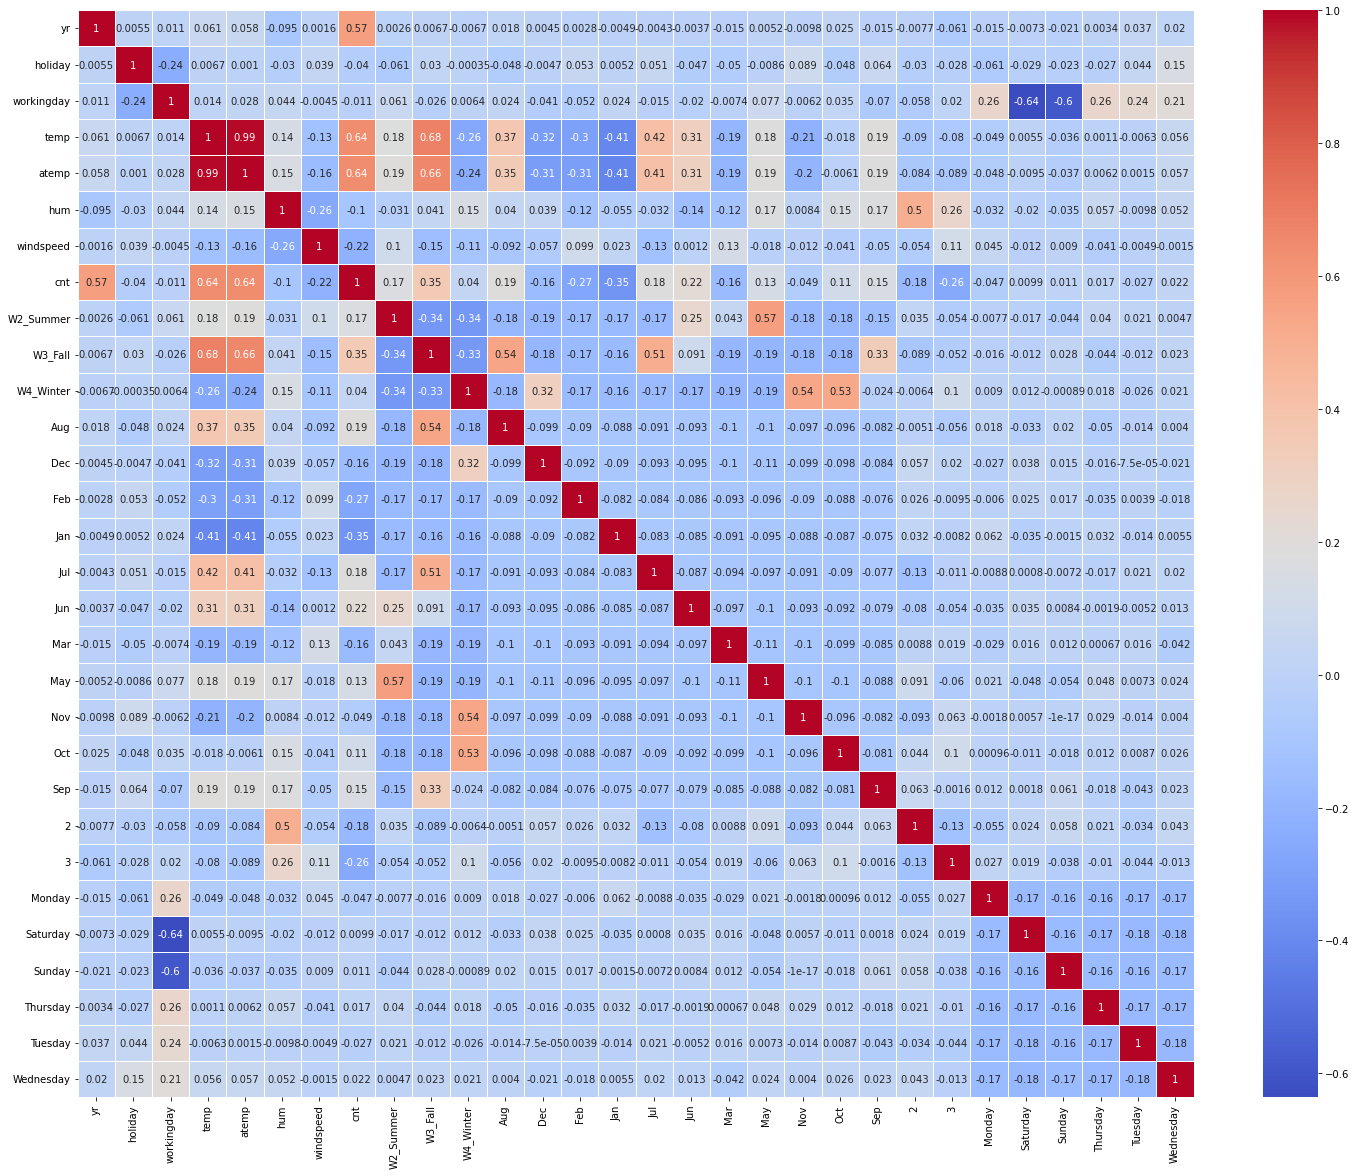

In [64]:
plt.figure(figsize = [25,20])
ax = sns.heatmap(bike_train.corr(), annot = True, cmap = 'coolwarm', linewidth = 1)
plt.show()

- `We can observe there's multi-colinearity between the variables. We need to consider the factors when developing the model.`
    - `temp & atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables.`
    - `workingday variable has high negative correlation with Sat & Sun(where workingday = 0).`
    - `Spring is negatively correlated with cnt.`
    - `temp, atemp, yr has strong correlation with cnt.`
    - `misty weather & humidity has correlation.`
    - `Various months & corresponding weather has correlation.`

## 6. Building the Linear Model

**6.1 Dividing into X_train and y_train**

In [65]:
y_train = bike_train.pop('cnt')
X_train = bike_train

**6.2 RFE**

`Recursive Feature Elimination: We will be using the LinearRegression function from Scikit-Learn for it's compability with RFE.`

In [66]:
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
#Running RFE 
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [67]:
#Checking which parameter has been selected in the list of 15
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 3),
 ('Feb', False, 6),
 ('Jan', False, 4),
 ('Jul', False, 5),
 ('Jun', False, 9),
 ('Mar', False, 15),
 ('May', False, 8),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 (2, True, 1),
 (3, True, 1),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [68]:
#Storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',  'W2_Summer',    'W3_Fall',  'W4_Winter',
              'Sep',            2,            3,   'Saturday',     'Sunday'],
      dtype='object')

In [69]:
#Checking which columns have been eliminated
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [70]:
#Creating X_train dataset with RFE selected variables
X_train_rfe = X_train[col]

**6.3 Manual Model Development using statsmodels**

In [71]:
#Function for VIF Calculations
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

**6.3.1 Model 1**

In [72]:
#Create a variable that will contain the names of all the feature variable and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,392.76
4,atemp,376.56
5,hum,36.48
2,workingday,27.73
8,W3_Fall,6.91
13,Saturday,6.30
14,Sunday,5.64
6,windspeed,5.47
7,W2_Summer,3.73
9,W4_Winter,2.48


In [73]:
#Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)
#Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

#Print a summary for the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.44e-191
Time:                        20:47:01   Log-Likelihood:                 522.54
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     494   BIC:                            -945.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3243      0.075      4.324      0.0

**6.3.2 Model 2**

- `Both temp and atemp has high VIF but atemp has high p-value additionally. We will go ahead with dropping atemp from the equation.`

In [74]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,hum,36.26
2,workingday,27.66
3,temp,24.78
7,W3_Fall,6.85
12,Saturday,6.30
13,Sunday,5.63
5,windspeed,5.30
6,W2_Summer,3.73
8,W4_Winter,2.47
10,2,2.47


In [75]:
#Add a constant
X_train_lm2 = sm.add_constant(X_train_new)
#Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

#Print a summary for the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.91e-192
Time:                        20:47:05   Log-Likelihood:                 522.42
No. Observations:                 510   AIC:                            -1015.
Df Residuals:                     495   BIC:                            -951.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3247      0.075      4.333      0.0

**6.3.3 Model 3**

- `As hum has highest VIF value, we will remove the variable next.`

In [76]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
#Run the function to calculate the VIF of new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,22.65
2,workingday,11.78
6,W3_Fall,6.69
4,windspeed,4.94
5,W2_Summer,3.69
11,Saturday,3.30
12,Sunday,2.94
7,W4_Winter,2.46
0,yr,1.95
9,2,1.58


In [77]:
#Add a constant
X_train_lm3 = sm.add_constant(X_train_new)
#Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

#Print a summary for the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          8.21e-187
Time:                        20:47:08   Log-Likelihood:                 506.24
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     496   BIC:                            -925.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1988      0.074      2.692      0.0

**6.3.4 Model 4**

- `We will remove W3_Fall next as it has high VIF.`

In [78]:
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,11.29
3,temp,7.83
4,windspeed,4.89
10,Saturday,3.16
11,Sunday,2.87
0,yr,1.93
6,W4_Winter,1.64
5,W2_Summer,1.62
8,2,1.58
1,holiday,1.27


In [79]:
#Add a constant
X_train_lm4 = sm.add_constant(X_train_new)
#Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

#Print a summary for the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          4.60e-186
Time:                        20:47:11   Log-Likelihood:                 501.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     497   BIC:                            -922.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1766      0.074      2.385      0.0

**6.3.5 Model 5**

- `We will remove Sunday next due to it's high p-value.`

In [80]:
X_train_new = X_train_new.drop(['Sunday'], axis = 1)
#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.09
2,workingday,4.64
4,windspeed,3.62
0,yr,1.90
10,Saturday,1.76
5,W2_Summer,1.62
8,2,1.47
6,W4_Winter,1.45
7,Sep,1.17
1,holiday,1.12


In [81]:
#Add a constant
X_train_lm5 = sm.add_constant(X_train_new)
#Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

#Print a summary for the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.49e-187
Time:                        20:47:14   Log-Likelihood:                 501.50
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1356      0.019      7.029      0.0

**6.3.6 Model 6**

- `We will remove 'holiday' due to it's high p-value.`

In [82]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.95
1,workingday,4.30
3,windspeed,3.52
0,yr,1.89
9,Saturday,1.71
4,W2_Summer,1.62
7,2,1.47
5,W4_Winter,1.45
6,Sep,1.17
8,3,1.09


In [83]:
#Add a constant
X_train_lm6 = sm.add_constant(X_train_new)
#Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

#Print a summary for the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          7.16e-186
Time:                        20:47:18   Log-Likelihood:                 495.54
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     499   BIC:                            -922.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1229      0.019      6.425      0.0

**6.3.7 Model 7**

- `We will remove 'saturday' here due to it's high p-value.`

In [84]:
X_train_new = X_train_new.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.29
3,windspeed,3.33
1,workingday,2.94
0,yr,1.89
4,W2_Summer,1.61
7,2,1.46
5,W4_Winter,1.40
6,Sep,1.17
8,3,1.08


In [85]:
#Add a constant
X_train_lm7 = sm.add_constant(X_train_new)
#Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

#Print a summary for the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          4.74e-187
Time:                        20:47:21   Log-Likelihood:                 495.42
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     500   BIC:                            -928.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1194      0.018      6.742      0.0

**6.3.8 Model 8**

- `We will remove 'workingday' due to it's high p-value.`

In [86]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,3.70
2,windspeed,3.14
0,yr,1.87
3,W2_Summer,1.61
6,2,1.45
4,W4_Winter,1.36
5,Sep,1.16
7,3,1.08


In [87]:
#Add a constant
X_train_lm8 = sm.add_constant(X_train_new)
#Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

#Print a summary for the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     306.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.95e-187
Time:                        20:47:24   Log-Likelihood:                 493.36
No. Observations:                 510   AIC:                            -968.7
Df Residuals:                     501   BIC:                            -930.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1069      0.017      6.427      0.0

In [198]:
#Checking the parameters
lr8.params

const             0.106939
yr                0.234441
temp              0.564763
windspeed        -0.153466
W2_Summer         0.086423
W4_Winter         0.135049
Sep               0.079848
Light_rainsnow   -0.260625
Misty            -0.075571
dtype: float64

- `As we can observe the model looks good as there's very low multicollinearity between the predictors and the p-values for all the predictors seems to be significant now, we will consider this as our final model(unless the test data metrics are not significantly close to this number).`

## 7. Final Model Interpretation

**Hypothesis Testing**

In [88]:
lr8.params

const        0.106939
yr           0.234441
temp         0.564763
windspeed   -0.153466
W2_Summer    0.086423
W4_Winter    0.135049
Sep          0.079848
2           -0.075571
3           -0.260625
dtype: float64

`From the lr8 model summary it is clear that all our coefficients are not equal to 0. Hence which means, we reject the null hypothesis.`

**F-Statistics:**

`F- Statistics is used for testing the overall significance of the model. The higher F-Statistics, the more significant the model is.`

- `F-statistic:                     306.2`
- `Prob (F-statistic):          1.95e-187`

- `The F-Statistics value of 306.2(which is greater than 1) and p-value of '~0.0000' states that the overall model is significant.`

**Interpretation of coefficients:**

- `const:` `The constant value of '0.106939' indicates that, in the absence of all other predictor variables(i.e when x1, x2,...., xn = 0), the bike rental can still increase by 0.084143 units.`

- `yr:` `A coefficient value of '0.234441' indicates that a unit increase in yr variable, increases the bike hire numbers by 0.234441 units.`

- `temp:` `A coefficient value of '0.564763' indicates that a unit increase in  temp variable, increases the bike hire numbers by 0.564763 units.`

- `windspeed:` `A coefficient value of '-0.153466' indicates that a unit increase in windspeed variable, decreases the bike hire numbers by 0.153466 units.`

- `W2_Summer:` `A coefficient value of '0.086423' indicates that a unit increase in W2_Summer variable, increases the bike hire numbers by 0.086423 units.`

- `W2_Winter:` `A coefficient value of '0.135049' indicates that a unit increase in W2_Winter variable, increases the bike rental numbers by 0.135049 units.`

- `Sep:` `A coefficient value of '0.079848' indicates that a unit increase in Sep variable, increases the bike hire numbers by 0.079848 units.`

- `Light_rainsnow:` `A coefficient value of '-0.260625' indicates that a unit in Light_rainsnow weather variable, decreases the bike hire numbers by 0.260625 units.`

- `Misty:` `A coefficient value of '-0.075571' indicates that a unit in Misty weather variable, decreases the bike hire numbers by 0.075571 units.`

## 8. Model Validation

`Validating the assumption of linear regression model:`

    - Linear Relationship
    - Homoscedasticity
    - Absence of Multicollinearity
    - Independance of Residuals
    - Normality of errors

**8.1 Linear Relationship**

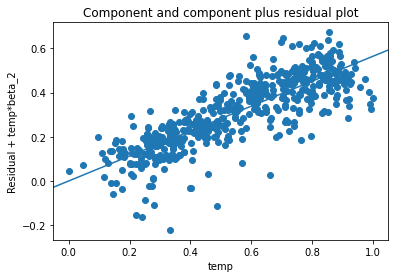

In [89]:
sm.graphics.plot_ccpr(lr8, 'temp')
plt.show()

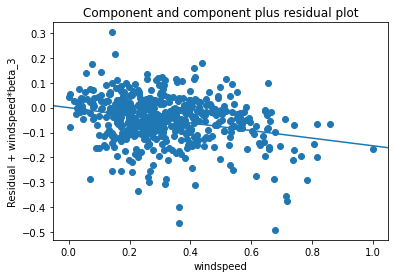

In [90]:
sm.graphics.plot_ccpr(lr8, 'windspeed')
plt.show()

- `The above plot represents the relationship between the model and the predictor variables. As we can observe, linearity is well preserved.`

**8.2 Homoscedasticity**

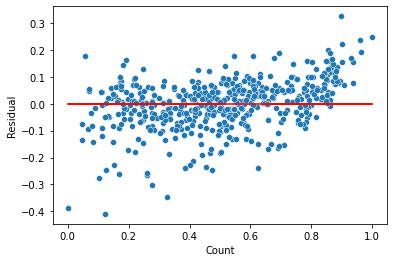

In [91]:
y_train_pred = lr8.predict(X_train_lm8)
residual = y_train - y_train_pred
sns.scatterplot(y_train, residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- `There is no visible pattern in the residual values, thus homoscedasticity is well preserved.`

**8.3 Absence of Multicollinearity**

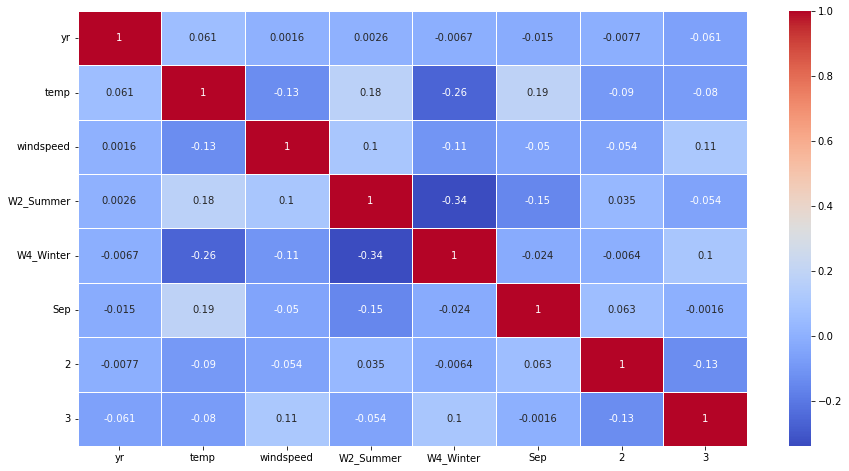

In [92]:
#Validating Multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(), annot = True, cmap = 'coolwarm', linewidth = 1)
plt.show()

In [204]:
#Run the function to calculate VIF of final model
calculateVIF(X_train_new)

,Features,VIF
1,temp,3.70
2,windspeed,3.14
0,yr,1.87
3,W2_Summer,1.61
7,Misty,1.45
4,W4_Winter,1.36
5,Sep,1.16
6,Light_rainsnow,1.08


- `All the predictor variables have VIF value less than 5. So, we can consider that there is insignificant multicollinearity among the predictor variables.`

**8.4 Independence of residuals**

`Autocorrelation refers to the fact that observations errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.`

    - 0-2: +ve auto-correlation
    - 2-4: -ve auto-correlation

In [93]:
print('The Durbin-Watson value for Final Model lr 8 is: ',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)), 4))

The Durbin-Watson value for Final Model lr 8 is:  1.9887


- `We can say there is almost no auto-correlation.`

**8.5 Normality of Error**

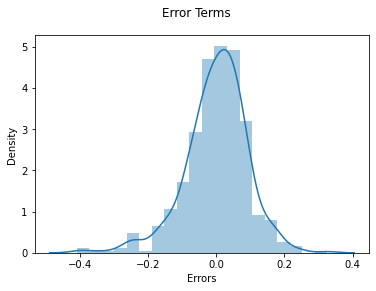

In [94]:
res = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')
plt.show()

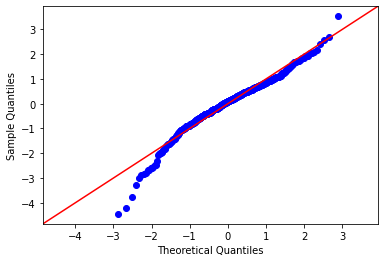

In [207]:
sm.qqplot((y_train - y_train_pred), fit = True, line = '45')
plt.show()

- `Based on the histogram, we can conclude that error terms are following a normal distribution.`

## 9. Making Predictions using Final Model

**9.1 Scaling bike_test DataFrame**

`Apply scaler() all numeric variables in test dataset. Note: We will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data. In other words, we want to prevent the information leak from train to test dataset.`

In [95]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,2,3,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
333,0,0,1,0.341207,0.324343,0.632030,0.488582,0.413139,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,0,1,1.013904,1.013214,0.515242,0.185727,0.375403,0,1,...,0,0,0,0,1,0,0,0,0,0
279,0,0,0,0.579699,0.594242,0.705024,-0.049804,0.570985,0,0,...,1,0,0,0,0,0,1,0,0,0
483,1,0,1,0.512322,0.518402,0.604980,0.154750,0.722734,1,0,...,0,0,0,0,1,0,0,0,0,0
267,0,0,1,0.737981,0.689572,0.870760,0.010767,0.573861,0,0,...,0,1,1,0,0,0,0,0,1,0


In [209]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.540909,0.040909,0.672727,0.577486,0.569385,0.652310,0.305077,0.529134,0.245455,0.277273,...,0.081818,0.122727,0.022727,0.327273,0.163636,0.127273,0.163636,0.136364,0.131818,0.122727
std,0.499460,0.198531,0.470288,0.244429,0.237294,0.141169,0.168920,0.221141,0.431338,0.448673,...,0.274713,0.328872,0.149373,0.470288,0.370789,0.334038,0.370789,0.343957,0.339064,0.328872
min,0.000000,0.000000,0.000000,0.049103,0.031559,0.311386,-0.049804,0.089623,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.371060,0.385512,0.551846,0.185059,0.381040,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.588790,0.599537,0.641738,0.283969,0.525311,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.780492,0.761869,0.752576,0.406005,0.705476,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.029946,1.064361,1.002146,0.800818,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**9.2 Dividing X_test & y_test**

In [96]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [97]:
#Selecting the variables that were part of final model.
col1 = X_train_new.columns

X_test = X_test[col1]

#Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 333 to 707
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      220 non-null    float64
 1   yr         220 non-null    int64  
 2   temp       220 non-null    float64
 3   windspeed  220 non-null    float64
 4   W2_Summer  220 non-null    uint8  
 5   W4_Winter  220 non-null    uint8  
 6   Sep        220 non-null    uint8  
 7   2          220 non-null    uint8  
 8   3          220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.7 KB


In [98]:
#Mking predictions using the final model(lr8)
y_pred = lr8.predict(X_test_lm8)

In [99]:
y_pred

333    0.359709
203    0.651051
279    0.577023
483    0.693394
267    0.661397
         ...   
574    0.780069
535    0.929377
290    0.488030
43     0.221928
707    0.599054
Length: 220, dtype: float64

## 10. Model Evaluation

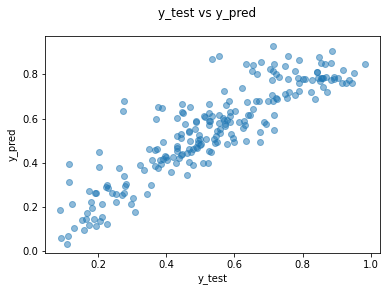

In [100]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha = 0.5)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

**R^2 Value Calculation of bike_test DataFrame**

In [101]:
r2 = round(r2_score(y_test, y_pred), 4)
r2

0.7768

**Adjusted R^2 Value Calculation for bike_test DataFrame**

In [102]:
# n is number of rows in test dataset
n = X_test.shape[0]

#Number of features(predictors, p) is the shape along axis 1
p = X_test.shape[1]

#We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1), 4)
adjusted_r2

0.7683

**Model Train & Test R^2 Statistics Comparision**

`We've observed that:`
- `For Train Dataset:`
    - `R-squared:`                       `0.830(83%)`
    - `Adj. R-squared:`                  `0.827(82.7%)`
- `For Test Dataset:`
    - `R-squared:`                       `0.7768(77.7%)`
    - `Adj. R-squared:`                  `0.7683(76.9%)`
    
- `As we can see our model seems to be really good that can generalize various dataset`

**Calculating RMSE for the selected Model**

In [103]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)), 4)
RMSE

0.1042

**Calculating Mean Absolute Error for the selected Model**

In [104]:
MAE = round(mean_absolute_error(y_test, y_pred), 4)
MAE

0.0775

- `The Root Mean Squared Error(RMSE) value for the test dataset based on the final model is 0.1042 and Mean Absolute Error(MAE) is 0.0775, which indicates that the model is really good.`

## Model Outcome Summary

- **`As per the final model, predictor variables that influences bike booking are:`**

    1. **`Temperature(temp):`** `A coefficient value of '0.564763' indicates that temperature has significant importance on bike rentals.`
    2. **`Light Rain & Snow(weathersit = 3):`** `A coefficient value of '-0.260625' indicates that the light snow and rain deters people from renting out bikes.`
    3. **`Year(yr):`** `A coefficient value of '0.234441' indicates that year wise bike rental numbers are increasing.`

- `It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.`
- `As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability & promotions to be increased during summer months to further increase bike rentals.`

## Conclusion:

**`Significant variables to predict the demand for bike rentals:`**

- `yr(Year)`
- `temp(Temperature)`
- `weathersit(Light_rainsnow, Misty[Weather - Light Rain & Snow, Misty])`
- `windspeed(Windspeed)`
- `W2_Summer & W4_Winter(Season - Summer & Winter)`
- `Sep(Month - September)`